In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import font_manager
import numpy as np

Read excel data

In [ ]:
xl_path = "TNB Base Tariff History.xlsx"
df = pd.read_csv(xl_path)

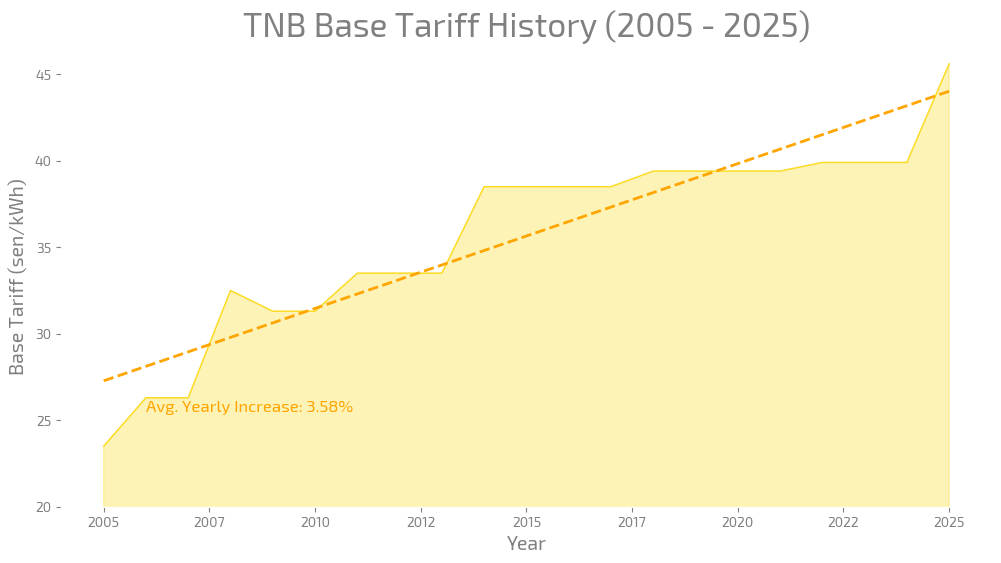

In [7]:


pl.figure(figsize=(12, 6))
pl.rcParams["font.family"] = "Exo 2"
font_manager.fontManager.addfont('C:/Users/User/Documents/Exo2-VariableFont_wght.ttf')

start_year = df["Year"].min()
end_year = df["Year"].max()
plot_title = f"TNB Base Tariff History ({start_year} - {end_year})"

# Line and points
pl.plot(df["Year"], df["Base Tariff (sen/kWh)"],
         linewidth=1,
         color='#fcd913',
         alpha=0.9)
pl.ylim(bottom=20)
pl.title(plot_title, fontsize=24, fontweight='bold', color='grey')

# Set x-axis to show years as integers only
pl.gca().xaxis.set_major_formatter(pl.FuncFormatter(lambda x, _: f'{int(x):d}'))
pl.gca().tick_params(axis='both', colors='grey')
pl.xlabel('Year', fontsize=14, fontweight='bold', color='grey')
pl.ylabel('Base Tariff (sen/kWh)', fontsize=14, fontweight='bold', color='grey')


# set grid edges to be white
pl.gca().spines['bottom'].set_color('white')
pl.gca().spines['top'].set_color('white')
pl.gca().spines['right'].set_color('white')
pl.gca().spines['left'].set_color('white')


# Fill the space below the line with a gradient
x = df["Year"]
y = df["Base Tariff (sen/kWh)"]
pl.fill_between(x, y, color='#fcd913', alpha=0.3)

# Fit a line using shifted years so that the intercept represents the base tariff at start_year
shifted_years = x - start_year
# calculate the year over year perentage increase
percentage_increase = (y - y.shift(1)) / y.shift(1) * 100
slope, intercept = np.polyfit(shifted_years, y, 1)

# Compute the best fit line values
best_fit = intercept + slope * (x - start_year)
pl.plot(x, best_fit, color='orange', linestyle='--', linewidth=2)

# Compute the gradient as percentage increase per year relative to the starting tariff
average_annnual_increase = np.mean(percentage_increase)

# Annotate the plot with the gradient information
pl.text(start_year + 1, y.min() + 2, f'Avg. Yearly Increase: {average_annnual_increase:.2f}%', color='orange', fontsize=12)
pl.show()